In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

pd.set_option('display.float_format', lambda x: '%0.2f' % x)

In [2]:
filename = "./datasets/default of credit card clients.csv"
dataset = pd.read_csv(filename, delimiter=";")

In [3]:
dataset.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [4]:
default_credit_columns = ["Given credit (NT$)",
                          "Gender",
                          "Education",
                          "Marital status",
                          "Age",
                          "Past, monthly payment (-1)",
                          "Past, monthly payment (-2)",
                          "Past, monthly payment (-3)",
                          "Past, monthly payment (-4)",
                          "Past, monthly payment (-5)",
                          "Past, monthly payment (-6)",
                          "Past, monthly bill (-1)",
                          "Past, monthly bill (-2)",
                          "Past, monthly bill (-3)",
                          "Past, monthly bill (-4)",
                          "Past, monthly bill (-5)",
                          "Past, monthly bill (-6)",
                          "Prev. payment in NT$ (-1)",
                          "Prev. payment in NT$ (-2)",
                          "Prev. payment in NT$ (-3)",
                          "Prev. payment in NT$ (-4)",
                          "Prev. payment in NT$ (-5)",
                          "Prev. payment in NT$ (-6)",
                          "Y"]

In [5]:
dataset.columns = default_credit_columns

In [6]:
dataset

,Given credit (NT$),Gender,Education,Marital status,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly payment (-3)","Past, monthly payment (-4)","Past, monthly payment (-5)",...,"Past, monthly bill (-4)","Past, monthly bill (-5)","Past, monthly bill (-6)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Prev. payment in NT$ (-3),Prev. payment in NT$ (-4),Prev. payment in NT$ (-5),Prev. payment in NT$ (-6),Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Analysis of values and corresponding feature intervals

In [7]:
for col in dataset.columns:
    s = col #Erro caso não atribua a uma var
    print(s, " - Existem ", dataset[s].unique().shape[0], "valores únicos e ", dataset[s].isnull().sum(), " valores vazios\n")
    print(dataset[s].unique(), "\n")
    print(dataset[s].value_counts(), "\n")
    print(dataset[s].describe())
    print("\n________________\n")

Given credit (NT$)  - Existem  81 valores únicos e  0  valores vazios

[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000] 

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: Given credit (NT$), Length: 81, dtype: int64 

count     30000.00
mean     167484.32
st

## Resulting analysis
X3 (Education) has values not defined in the dictionary.
1. 0 - 14  values
2. 5 - 280 values
3. 6 - 51 values

X4 (Marital status) is in the same situation
1. 0 - 54 values

The best course of action for these values would be to remove them, since they are only a few cases and it is not defined what they mean.

Features X12 to X17 have records with negative values. These features are related to the bill statement

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Past, monthly payment (-1), dtype: int64


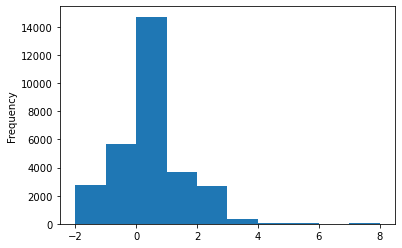

In [8]:
dataset["Past, monthly payment (-1)"].plot(kind="hist")
print(dataset["Past, monthly payment (-1)"].value_counts())

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Past, monthly payment (-2), dtype: int64


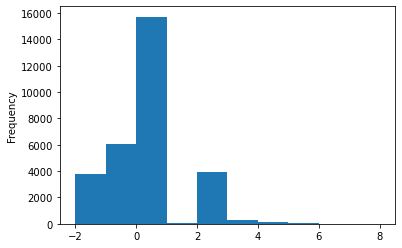

In [9]:
dataset["Past, monthly payment (-2)"].plot(kind="hist")
print(dataset["Past, monthly payment (-2)"].value_counts())

In [10]:
dataset.shape[0]

30000

In [11]:
dataset["Y"].value_counts().sort_index()


0    23364
1     6636
Name: Y, dtype: int64

## Comparing to the described values in the dictionary

The interval of possible values of the features X6-X11 is [-1, 9] (excluding 0).

The analysis below indicates a big discrepancy in this rule, with the majority of values being 0, a considerable amount with the value -2 and none with the value 9. This might indicate an error either in data-input or the creation of the dictionary.
Deciding based on logical intuition of the absence of a possible value across these features, along with the presence of values that should not exist, we conclude that the best course of action to take here is to:

1. Agglomerate features with values 0 into the ones with value -1
2. Increment by one these features - thus making rows with these features' values 9 possible


Tendo em conta o ponto 1, é uma quantidade considerável de registos cujo valor é 0 para as variáveis vistas.
Já que a distribuição da amostra favorece o caso onde a falha no pagamento é 0 (ou seja, o pagamento é previsto como realizado) E tendo em consideração o facto das análises realizadas até agora considerarem o PAY_1 (atraso no pagamento no mês anterior)


In [12]:
# Verification of values not described in the dictionary
print(dataset["Past, monthly payment (-1)"].value_counts().sort_index())
print(dataset["Past, monthly payment (-2)"].value_counts().sort_index())
print(dataset["Past, monthly payment (-3)"].value_counts().sort_index())
print(dataset["Past, monthly payment (-4)"].value_counts().sort_index())
print(dataset["Past, monthly payment (-5)"].value_counts().sort_index())
print(dataset["Past, monthly payment (-6)"].value_counts().sort_index())

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: Past, monthly payment (-1), dtype: int64
-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: Past, monthly payment (-2), dtype: int64
-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: Past, monthly payment (-3), dtype: int64
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: Past, monthly payment (-4), dtype: int64
-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: Past, monthly payment (-5), dtype: int64
-2     4895
-1     5740
 0    16286
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 8       

In [13]:
dataset

,Given credit (NT$),Gender,Education,Marital status,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly payment (-3)","Past, monthly payment (-4)","Past, monthly payment (-5)",...,"Past, monthly bill (-4)","Past, monthly bill (-5)","Past, monthly bill (-6)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Prev. payment in NT$ (-3),Prev. payment in NT$ (-4),Prev. payment in NT$ (-5),Prev. payment in NT$ (-6),Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Past, monthly payment (x) indicate whether there was delays in payment for the month x.
IF Past, monthly payment (x) > Past, monthly payment (x-1) THEN the client paid one of the delayed months


IF Past, monthly payment (x) < Past, monthly payment (x-1) THEN the client managed to repay one payment which was missed previously 


Practical Example:

Client Y has Past, monthly payment (-1) = 1 and  Past, monthly payment (-2) = 2, this means that in -2 the client was behind payment by 2 months, but in -1 Y managed to reduce the delay to just having one month (thus, the value being "1")

In [14]:
dataset[dataset['Past, monthly payment (-1)'] == 2]

,Given credit (NT$),Gender,Education,Marital status,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly payment (-3)","Past, monthly payment (-4)","Past, monthly payment (-5)",...,"Past, monthly bill (-4)","Past, monthly bill (-5)","Past, monthly bill (-6)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Prev. payment in NT$ (-3),Prev. payment in NT$ (-4),Prev. payment in NT$ (-5),Prev. payment in NT$ (-6),Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
22,70000,2,2,2,26,2,0,0,2,2,...,44006,46905,46012,2007,3582,0,3601,0,1820,1
31,50000,1,2,2,33,2,0,0,0,0,...,22734,23217,23680,1718,1500,1000,1000,1000,716,1
54,150000,2,1,2,29,2,0,0,0,0,...,26518,21042,16540,1600,1718,1049,1500,2000,5000,0
62,50000,1,1,2,29,2,2,2,2,2,...,25865,27667,28264,0,2700,0,2225,1200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29932,160000,1,3,1,42,2,0,0,0,0,...,130023,98604,101650,6000,5500,5000,3000,4000,3000,1
29938,30000,1,2,2,38,2,2,2,2,0,...,21471,21598,23241,1700,1700,0,782,2000,1100,0
29966,150000,1,5,2,31,2,0,0,0,-2,...,0,0,0,4633,2000,0,0,0,0,1
29976,40000,1,2,2,47,2,2,3,2,2,...,51259,47151,46934,4000,0,2000,0,3520,0,1


# Correlation matrix to determine if there are feature to remove

For features that might be needed to remove due to high correlation to a specific feature:
Structure of the list below:
1. Maintain feature
 1. Remove feature
 
 
1. Past, monthly bill (-1)
 1. Past, monthly bill (-2)
 2. Past, monthly bill (-3)
 3. Past, monthly bill (-4)
 4. Past, monthly bill (-5)
 5. Past, monthly bill (-6)

See Past, monthly payment features to see if they should be removed


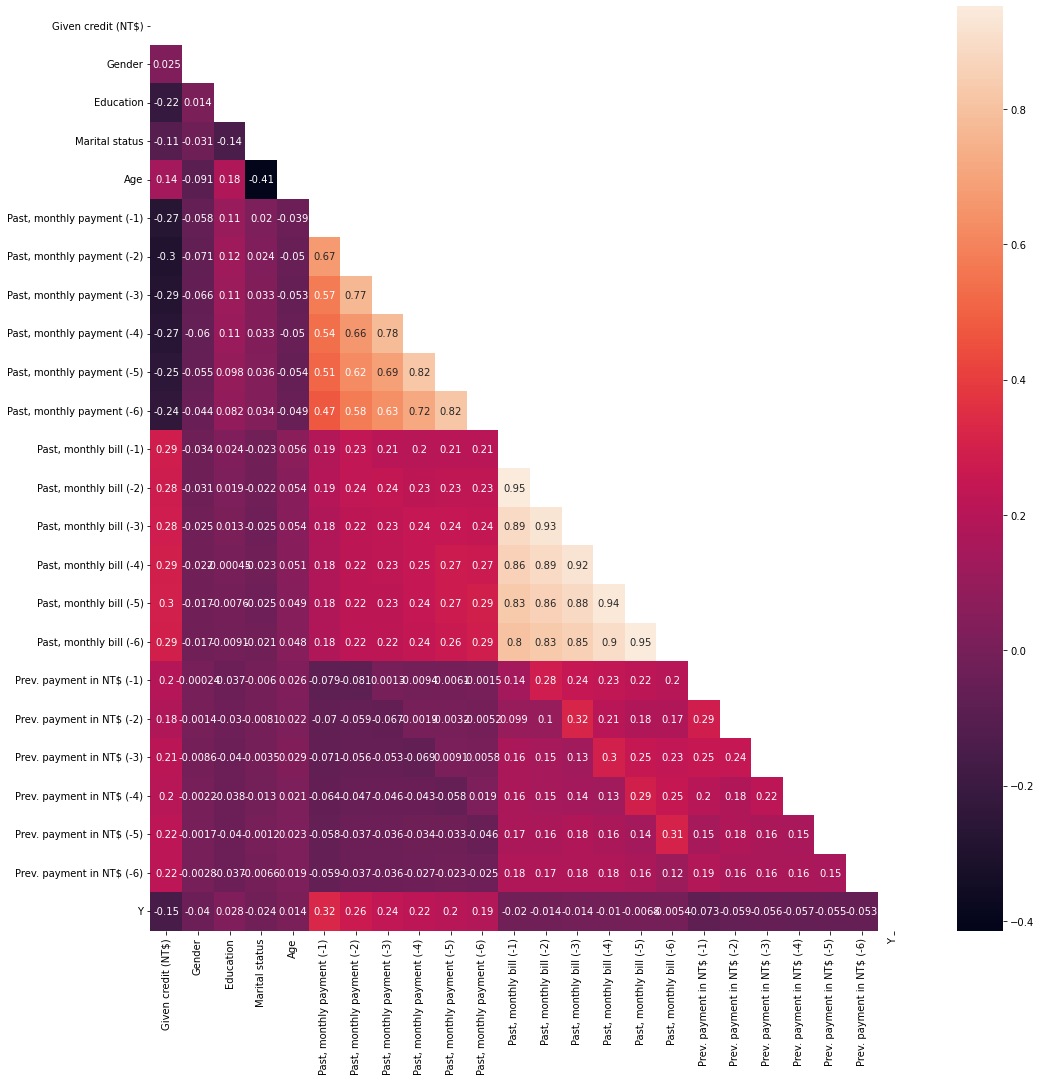

In [15]:
feat_corr = dataset.corr()
fig, ax = plt.subplots(figsize=(17, 17))
mask = np.triu(np.ones_like(feat_corr, dtype=bool))
sn.heatmap(feat_corr, mask = mask, annot=True, ax=ax)
plt.show()

In [16]:
dataset

,Given credit (NT$),Gender,Education,Marital status,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly payment (-3)","Past, monthly payment (-4)","Past, monthly payment (-5)",...,"Past, monthly bill (-4)","Past, monthly bill (-5)","Past, monthly bill (-6)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Prev. payment in NT$ (-3),Prev. payment in NT$ (-4),Prev. payment in NT$ (-5),Prev. payment in NT$ (-6),Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


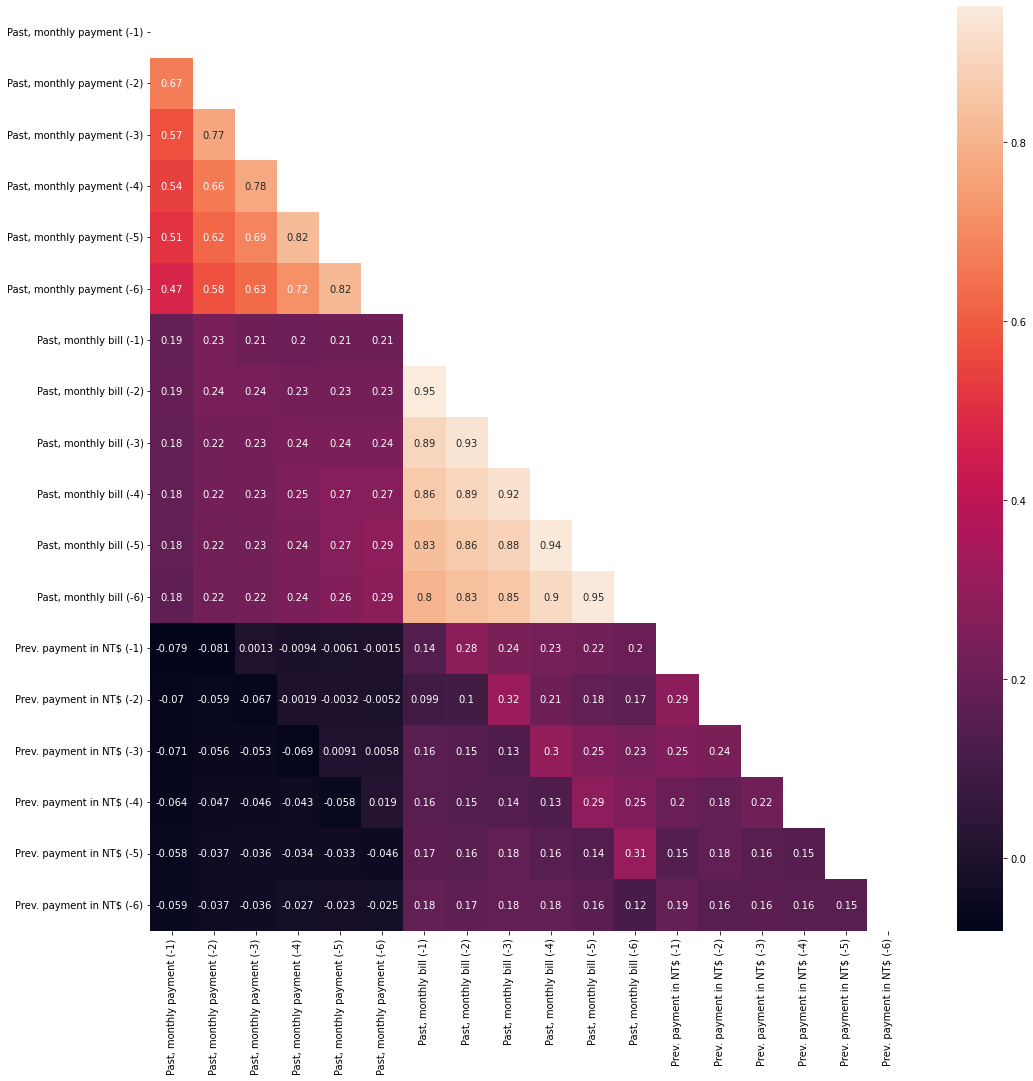

In [17]:
feat_corr = dataset[["Past, monthly payment (-1)",
    "Past, monthly payment (-2)",
    "Past, monthly payment (-3)",
    "Past, monthly payment (-4)",
    "Past, monthly payment (-5)",
    "Past, monthly payment (-6)",
    "Past, monthly bill (-1)",
    "Past, monthly bill (-2)",
    "Past, monthly bill (-3)",
    "Past, monthly bill (-4)",
    "Past, monthly bill (-5)",
    "Past, monthly bill (-6)",
    "Prev. payment in NT$ (-1)",
    "Prev. payment in NT$ (-2)",
    "Prev. payment in NT$ (-3)",
    "Prev. payment in NT$ (-4)",
    "Prev. payment in NT$ (-5)",
    "Prev. payment in NT$ (-6)"]].corr()
fig, ax = plt.subplots(figsize=(17, 17))
mask = np.triu(np.ones_like(feat_corr, dtype=bool))
sn.heatmap(feat_corr, mask = mask, annot=True, ax=ax)
plt.show()

## Data Pre-cleaning

Remove the values described above for the features "Education" and "Marital status"

Removed the columns:
1. Past, monthly payment (-3)
1. Past, monthly payment (-4)
1. Past, monthly payment (-5)
1. Past, monthly payment (-6)
1. Past, monthly bill (-3)
1. Past, monthly bill (-4)
1. Past, monthly bill (-5)
1. Past, monthly bill (-6)
1. Prev. payment in NT (-3)
1. Prev. payment in NT (-4)
1. Prev. payment in NT (-5)
1. Prev. payment in NT (-6)

In [18]:
dataset = dataset[(dataset['Education'] != 0) &
                 (dataset['Education'] != 5) &
                 (dataset['Education'] != 6) &
                 (dataset['Marital status'] != 0)]

In [19]:
cols_delete = ["Past, monthly payment (-3)",
                "Past, monthly payment (-4)",
                "Past, monthly payment (-5)",
                "Past, monthly payment (-6)",
                "Past, monthly bill (-3)",
                "Past, monthly bill (-4)",
                "Past, monthly bill (-5)",
                "Past, monthly bill (-6)",
                "Prev. payment in NT$ (-3)",
                "Prev. payment in NT$ (-4)",
                "Prev. payment in NT$ (-5)",
                "Prev. payment in NT$ (-6)",]
dataset = dataset.drop(cols_delete, axis=1)

# One-Hot Encoder for categorical features and data cleaning/preparation
		
1. Gender
2. Marital status

"Education" is a categorical feature but since it follows a descending order, it would be best not to apply OHE

Features from Past Payment (-1) to Past Payment (-6) are ordinal and thus OHE will not be applied

In [20]:
# columns to one-hot encode
ohe_gender_dict = {"1": "male", "2": "female"}
ohe_marital_dict = {"1": "married", "2": "single", "3": "others"}
ohe_cols = ['Gender', 'Marital status']

dataset[ohe_cols] = dataset[ohe_cols].astype(str)
dataset["Gender"] = dataset["Gender"].replace(ohe_gender_dict)
dataset["Marital status"] = dataset["Marital status"].replace(ohe_marital_dict)
# perform one-hot encoding
encoded_cols = pd.get_dummies(dataset[ohe_cols])

# drop the original columns from the DataFrame
#df = df.drop(cols_to_encode, axis=1)

# concatenate the encoded columns to the original DataFrame
dataset = pd.concat([dataset, encoded_cols], axis=1)

In [21]:
dataset

,Given credit (NT$),Gender,Education,Marital status,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly bill (-1)","Past, monthly bill (-2)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Y,Gender_female,Gender_male,Marital status_married,Marital status_others,Marital status_single
0,20000,female,2,married,24,2,2,3913,3102,0,689,1,1,0,1,0,0
1,120000,female,2,single,26,-1,2,2682,1725,0,1000,1,1,0,0,0,1
2,90000,female,2,single,34,0,0,29239,14027,1518,1500,0,1,0,0,0,1
3,50000,female,2,married,37,0,0,46990,48233,2000,2019,0,1,0,1,0,0
4,50000,male,2,married,57,-1,0,8617,5670,2000,36681,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,3,married,39,0,0,188948,192815,8500,20000,0,0,1,1,0,0
29996,150000,male,3,single,43,-1,-1,1683,1828,1837,3526,0,0,1,0,0,1
29997,30000,male,2,single,37,4,3,3565,3356,0,0,1,0,1,0,0,1
29998,80000,male,3,married,41,1,-1,-1645,78379,85900,3409,1,0,1,1,0,0


In [22]:
dataset

,Given credit (NT$),Gender,Education,Marital status,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly bill (-1)","Past, monthly bill (-2)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Y,Gender_female,Gender_male,Marital status_married,Marital status_others,Marital status_single
0,20000,female,2,married,24,2,2,3913,3102,0,689,1,1,0,1,0,0
1,120000,female,2,single,26,-1,2,2682,1725,0,1000,1,1,0,0,0,1
2,90000,female,2,single,34,0,0,29239,14027,1518,1500,0,1,0,0,0,1
3,50000,female,2,married,37,0,0,46990,48233,2000,2019,0,1,0,1,0,0
4,50000,male,2,married,57,-1,0,8617,5670,2000,36681,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,3,married,39,0,0,188948,192815,8500,20000,0,0,1,1,0,0
29996,150000,male,3,single,43,-1,-1,1683,1828,1837,3526,0,0,1,0,0,1
29997,30000,male,2,single,37,4,3,3565,3356,0,0,1,0,1,0,0,1
29998,80000,male,3,married,41,1,-1,-1645,78379,85900,3409,1,0,1,1,0,0


# Outlier identification by application of Inter-Quartile Range (IQR)

1. Age
1. Given credit (NT)
2. Past, monthly payment (-1)
3. Past, monthly payment (-2)
4. Past, monthly payment (-3)
5. Past, monthly payment (-4)
6. Past, monthly payment (-5)
7. Past, monthly payment (-6)
8. Past, monthly bill (-1)
9. Past, monthly bill (-2)
10. Past, monthly bill (-3)
11. Past, monthly bill (-4)
12. Past, monthly bill (-5)
13. Past, monthly bill (-6)
14. Prev. payment in NT (-1)
15. Prev. payment in NT (-2)
16. Prev. payment in NT (-3)
17. Prev. payment in NT (-4)
18. Prev. payment in NT (-5)
19. Prev. payment in NT (-6)


For all features related to the payment history (Past, monthly payment (-X)) outlier identification and removal was done considering the classes in which the distribution was negligible. In other words, removed based on the frequency when analyzed in a broader perspective.

As such, for these variables, since the frequency from values 2 is much greater than those for the values above 3, we remove the values above 2 

In [23]:
dataset

,Given credit (NT$),Gender,Education,Marital status,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly bill (-1)","Past, monthly bill (-2)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Y,Gender_female,Gender_male,Marital status_married,Marital status_others,Marital status_single
0,20000,female,2,married,24,2,2,3913,3102,0,689,1,1,0,1,0,0
1,120000,female,2,single,26,-1,2,2682,1725,0,1000,1,1,0,0,0,1
2,90000,female,2,single,34,0,0,29239,14027,1518,1500,0,1,0,0,0,1
3,50000,female,2,married,37,0,0,46990,48233,2000,2019,0,1,0,1,0,0
4,50000,male,2,married,57,-1,0,8617,5670,2000,36681,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,3,married,39,0,0,188948,192815,8500,20000,0,0,1,1,0,0
29996,150000,male,3,single,43,-1,-1,1683,1828,1837,3526,0,0,1,0,0,1
29997,30000,male,2,single,37,4,3,3565,3356,0,0,1,0,1,0,0,1
29998,80000,male,3,married,41,1,-1,-1645,78379,85900,3409,1,0,1,1,0,0


In [24]:
dataset[(dataset["Past, monthly payment (-1)"] <= 2) & (dataset["Past, monthly payment (-2)"] <= 2)]

,Given credit (NT$),Gender,Education,Marital status,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly bill (-1)","Past, monthly bill (-2)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Y,Gender_female,Gender_male,Marital status_married,Marital status_others,Marital status_single
0,20000,female,2,married,24,2,2,3913,3102,0,689,1,1,0,1,0,0
1,120000,female,2,single,26,-1,2,2682,1725,0,1000,1,1,0,0,0,1
2,90000,female,2,single,34,0,0,29239,14027,1518,1500,0,1,0,0,0,1
3,50000,female,2,married,37,0,0,46990,48233,2000,2019,0,1,0,1,0,0
4,50000,male,2,married,57,-1,0,8617,5670,2000,36681,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000,male,2,single,34,2,2,72557,77708,7000,3500,1,0,1,0,0,1
29995,220000,male,3,married,39,0,0,188948,192815,8500,20000,0,0,1,1,0,0
29996,150000,male,3,single,43,-1,-1,1683,1828,1837,3526,0,0,1,0,0,1
29998,80000,male,3,married,41,1,-1,-1645,78379,85900,3409,1,0,1,1,0,0


For the Past, monthly payment (-X) 755 instances of the original dataset are removed

In [25]:
# Remove outliers of Past, monthly payment (-X)
dataset = dataset[(dataset["Past, monthly payment (-1)"] <= 2) & (dataset["Past, monthly payment (-2)"] <= 2)]

iqr_cols =["Age",
"Given credit (NT$)",
#"Past, monthly payment (-1)",
#"Past, monthly payment (-2)",
"Past, monthly bill (-1)",
"Past, monthly bill (-2)",
"Prev. payment in NT$ (-1)",
"Prev. payment in NT$ (-2)"]


# calculate the IQR for each column
q1 = dataset[iqr_cols].quantile(0.25)
q3 = dataset[iqr_cols].quantile(0.75)
iqr = q3 - q1

iqr_range = [1.5, 1.75, 2]
for x in iqr_range:
    print("IQR Outlier detection with range ", str(x))
    # define the lower and upper bounds for each column
    lower_bound = q1 - (x * iqr)
    upper_bound = q3 + (x * iqr)

    # identify and mark any outliers
    outliers = (dataset[iqr_cols] < lower_bound) | (dataset[iqr_cols] > upper_bound)

    # For each column check the number of outliers present
    for column in outliers.columns:
        print("The column ", column, " has ", outliers[outliers[column] == True][column].count(), " ouliers")
        #print(dataset[iqr_cols][outliers].describe())

        
    print("\n")
    dataset[iqr_cols] = dataset.loc[~outliers.any(axis=1), iqr_cols]
    
    
    

# remove the outliers from the DataFrame
#dataset[iqr_cols] = dataset.loc[~outliers.any(axis=1), iqr_cols]

IQR Outlier detection with range  1.5
The column  Age  has  260  ouliers
The column  Given credit (NT$)  has  184  ouliers
The column  Past, monthly bill (-1)  has  2302  ouliers
The column  Past, monthly bill (-2)  has  2297  ouliers
The column  Prev. payment in NT$ (-1)  has  2666  ouliers
The column  Prev. payment in NT$ (-2)  has  2720  ouliers


IQR Outlier detection with range  1.75
The column  Age  has  0  ouliers
The column  Given credit (NT$)  has  0  ouliers
The column  Past, monthly bill (-1)  has  0  ouliers
The column  Past, monthly bill (-2)  has  0  ouliers
The column  Prev. payment in NT$ (-1)  has  0  ouliers
The column  Prev. payment in NT$ (-2)  has  0  ouliers


IQR Outlier detection with range  2
The column  Age  has  0  ouliers
The column  Given credit (NT$)  has  0  ouliers
The column  Past, monthly bill (-1)  has  0  ouliers
The column  Past, monthly bill (-2)  has  0  ouliers
The column  Prev. payment in NT$ (-1)  has  0  ouliers
The column  Prev. payment in NT

C:\Users\RHINES~1\AppData\Local\Temp/ipykernel_12924/412623342.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[iqr_cols] = dataset.loc[~outliers.any(axis=1), iqr_cols]
C:\Users\RHINES~1\AppData\Local\Temp/ipykernel_12924/412623342.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[iqr_cols] = dataset.loc[~outliers.any(axis=1), iqr_cols]
C:\Users\RHINES~1\AppData\Local\Temp/ipykernel_12924/412623342.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [26]:
dataset

,Given credit (NT$),Gender,Education,Marital status,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly bill (-1)","Past, monthly bill (-2)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Y,Gender_female,Gender_male,Marital status_married,Marital status_others,Marital status_single
0,20000.00,female,2,married,24.00,2,2,3913.00,3102.00,0.00,689.00,1,1,0,1,0,0
1,120000.00,female,2,single,26.00,-1,2,2682.00,1725.00,0.00,1000.00,1,1,0,0,0,1
2,90000.00,female,2,single,34.00,0,0,29239.00,14027.00,1518.00,1500.00,0,1,0,0,0,1
3,50000.00,female,2,married,37.00,0,0,46990.00,48233.00,2000.00,2019.00,0,1,0,1,0,0
4,NaN,male,2,married,NaN,-1,0,NaN,NaN,NaN,NaN,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,80000.00,male,2,single,34.00,2,2,72557.00,77708.00,7000.00,3500.00,1,0,1,0,0,1
29995,NaN,male,3,married,NaN,0,0,NaN,NaN,NaN,NaN,0,0,1,1,0,0
29996,150000.00,male,3,single,43.00,-1,-1,1683.00,1828.00,1837.00,3526.00,0,0,1,0,0,1
29998,NaN,male,3,married,NaN,1,-1,NaN,NaN,NaN,NaN,1,0,1,1,0,0


In [27]:
dataset = dataset.dropna()

In [28]:
dataset

,Given credit (NT$),Gender,Education,Marital status,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly bill (-1)","Past, monthly bill (-2)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Y,Gender_female,Gender_male,Marital status_married,Marital status_others,Marital status_single
0,20000.00,female,2,married,24.00,2,2,3913.00,3102.00,0.00,689.00,1,1,0,1,0,0
1,120000.00,female,2,single,26.00,-1,2,2682.00,1725.00,0.00,1000.00,1,1,0,0,0,1
2,90000.00,female,2,single,34.00,0,0,29239.00,14027.00,1518.00,1500.00,0,1,0,0,0,1
3,50000.00,female,2,married,37.00,0,0,46990.00,48233.00,2000.00,2019.00,0,1,0,1,0,0
5,50000.00,male,1,single,37.00,0,0,64400.00,57069.00,2500.00,1815.00,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29990,140000.00,male,2,married,41.00,0,0,138325.00,137142.00,6000.00,7000.00,0,0,1,1,0,0
29992,10000.00,male,3,married,43.00,0,0,8802.00,10400.00,2000.00,0.00,0,0,1,1,0,0
29994,80000.00,male,2,single,34.00,2,2,72557.00,77708.00,7000.00,3500.00,1,0,1,0,0,1
29996,150000.00,male,3,single,43.00,-1,-1,1683.00,1828.00,1837.00,3526.00,0,0,1,0,0,1


In [29]:
dataset = dataset.drop(columns=['Gender', 'Marital status'])

# Bias analysis

Bias concern has led to an more detailed analysis of feature distribution present in the dataset. The purpose of this section is to determine possible causes for biases, seen in an analysis of resulting explanations.

One of the main reasons for the initial concern was due to the fact that SHAP, among other XAI methods, defined Age as the primary factor to change so that the predictive value for any given instance switched from 0 to 1 or vice versa.
This clearly indicates some level of bias, and further inspections made it clear that age was not being processed for outliers, which it should be, and past, monthly payment was when it shouldn't.

So, the initial treatment, where age was not searched for in the case of outliers, there were only 2990 instances where default was the predictive output. After the needed changes to include age and exclude past, monthly payment, the instances where default happened totalled 5705. This number is very important as this means that out of the total 6000 we were losing more than half of our original, default instances due to mismanagement of feature processing. One of the key takeaways is that before the maximum value for the variables related to past, monthly payment was 1, while now the original range of values was maintained. In the next block of code we will check how many instances, where default was predicted, exist where past, monthly payment was greater than 1.

Instances removed due to value of Past, monthly payment (-1) or Past, monthly payment (-2) being greater than 1:

Y = 0 -> 1444 
Y = 1 -> 1417 

In [30]:
dataset[(((dataset["Past, monthly payment (-1)"] > 1) &
         (dataset["Past, monthly payment (-2)"] <= 1)) |
        ((dataset["Past, monthly payment (-2)"]> 1) & 
        (dataset["Past, monthly payment (-1)"]<= 1))) & (dataset["Y"] == 1)]

,Given credit (NT$),Education,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly bill (-1)","Past, monthly bill (-2)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Y,Gender_female,Gender_male,Marital status_married,Marital status_others,Marital status_single
1,120000.00,2,26.00,-1,2,2682.00,1725.00,0.00,1000.00,1,1,0,0,0,1
13,70000.00,2,30.00,1,2,65802.00,67369.00,3200.00,0.00,1,0,1,0,0,1
22,70000.00,2,26.00,2,0,41087.00,42445.00,2007.00,3582.00,1,1,0,0,0,1
31,50000.00,2,33.00,2,0,30518.00,29618.00,1718.00,1500.00,1,0,1,0,0,1
50,70000.00,3,42.00,1,2,37042.00,36171.00,0.00,3100.00,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29785,10000.00,2,47.00,2,0,8640.00,9043.00,1145.00,1136.00,1,0,1,0,0,1
29817,50000.00,2,40.00,2,0,11058.00,12479.00,2000.00,2000.00,1,0,1,0,0,1
29905,50000.00,3,30.00,1,2,17479.00,18195.00,1300.00,0.00,1,0,1,1,0,0
29932,160000.00,3,42.00,2,0,139983.00,125833.00,6000.00,5500.00,1,0,1,1,0,0


In [31]:
dataset[(((dataset["Past, monthly payment (-1)"] > 1) &
         (dataset["Past, monthly payment (-2)"] <= 1)) |
        ((dataset["Past, monthly payment (-2)"]> 1) & 
        (dataset["Past, monthly payment (-1)"]<= 1))) & (dataset["Y"] == 0)]

,Given credit (NT$),Education,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly bill (-1)","Past, monthly bill (-2)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Y,Gender_female,Gender_male,Marital status_married,Marital status_others,Marital status_single
15,50000.00,3,23.00,1,2,50614.00,29173.00,0.00,1500.00,0,1,0,0,1,0
53,180000.00,1,25.00,1,2,41402.00,41742.00,1300.00,2010.00,0,1,0,0,0,1
54,150000.00,1,29.00,2,0,46224.00,34993.00,1600.00,1718.00,0,1,0,0,0,1
67,210000.00,1,30.00,2,-1,300.00,300.00,300.00,1159.00,0,1,0,0,0,1
142,50000.00,2,23.00,1,2,10131.00,10833.00,1000.00,10000.00,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29933,190000.00,3,44.00,-1,2,291.00,291.00,0.00,582.00,0,0,1,1,0,0
29940,20000.00,2,48.00,1,2,20733.00,20109.00,2.00,2019.00,0,0,1,1,0,0
29950,220000.00,1,32.00,-1,2,528.00,264.00,0.00,264.00,0,0,1,1,0,0
29955,410000.00,1,32.00,-1,2,380.00,190.00,0.00,190.00,0,0,1,0,0,1


In [32]:
for col in dataset.columns:
    print(col, " for the Y = 1 (Default):\n")
    display(dataset[col].loc[dataset["Y"] == 1].describe().to_frame().T)
    print(col, " for the Y = 0 (Not-Default):\n")
    display(dataset[col].loc[dataset["Y"] == 0].describe().to_frame().T)

Given credit (NT$)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Given credit (NT$),5256.00,115344.37,103144.64,10000.00,50000.00,80000.00,160000.00,500000.00


Given credit (NT$)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Given credit (NT$),17560.00,152500.34,116054.35,10000.00,50000.00,130000.00,210000.00,510000.00


Education  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Education,5256.00,1.89,0.70,1.00,1.00,2.00,2.00,4.00


Education  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Education,17560.00,1.82,0.71,1.00,1.00,2.00,2.00,4.00


Age  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Age,5256.00,35.28,9.34,21.00,27.00,34.00,42.00,60.00


Age  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Age,17560.00,34.85,8.82,21.00,28.00,33.00,41.00,60.00


Past, monthly payment (-1)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly payment (-1)",5256.00,0.51,1.23,-2.00,0.00,0.00,2.00,2.00


Past, monthly payment (-1)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly payment (-1)",17560.00,-0.20,0.91,-2.00,-1.00,0.00,0.00,2.00


Past, monthly payment (-2)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly payment (-2)",5256.00,0.28,1.38,-2.00,-1.00,0.00,2.00,2.00


Past, monthly payment (-2)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly payment (-2)",17560.00,-0.32,1.00,-2.00,-1.00,0.00,0.00,2.00


Past, monthly bill (-1)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly bill (-1)",5256.00,31036.57,35914.88,-6029.00,2367.75,17593.00,48297.25,161159.00


Past, monthly bill (-1)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly bill (-1)",17560.00,34451.97,38814.38,-11545.00,2599.00,19198.50,51667.25,162241.00


Past, monthly bill (-2)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly bill (-2)",5256.00,30023.12,35051.80,-9119.00,1781.00,17383.00,47591.00,155392.00


Past, monthly bill (-2)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly bill (-2)",17560.00,31829.84,37486.30,-18618.00,1732.00,17154.00,49588.25,155438.00


Prev. payment in NT$ (-1)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Prev. payment in NT$ (-1),5256.00,1947.67,2013.40,0.00,0.00,1568.00,3000.00,11000.00


Prev. payment in NT$ (-1)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Prev. payment in NT$ (-1),17560.00,2539.13,2325.70,0.00,973.75,2000.00,3630.00,11100.00


Prev. payment in NT$ (-2)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Prev. payment in NT$ (-2),5256.00,1898.81,2036.42,0.00,0.00,1500.00,2980.75,11000.00


Prev. payment in NT$ (-2)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Prev. payment in NT$ (-2),17560.00,2388.88,2274.88,0.00,693.25,1903.00,3378.25,11000.00


Y  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Y,5256.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


Y  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Y,17560.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Gender_female  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Gender_female,5256.00,0.58,0.49,0.00,0.00,1.00,1.00,1.00


Gender_female  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Gender_female,17560.00,0.62,0.48,0.00,0.00,1.00,1.00,1.00


Gender_male  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Gender_male,5256.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00


Gender_male  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Gender_male,17560.00,0.38,0.48,0.00,0.00,0.00,1.00,1.00


Marital status_married  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_married,5256.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00


Marital status_married  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_married,17560.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00


Marital status_others  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_others,5256.00,0.01,0.11,0.00,0.00,0.00,0.00,1.00


Marital status_others  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_others,17560.00,0.01,0.10,0.00,0.00,0.00,0.00,1.00


Marital status_single  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_single,5256.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00


Marital status_single  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_single,17560.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


# Final feature list

Categorical:

Gender_female
Gender_male
Marital status_married
Marital status_others
Marital status_single
Past, monthly payment (-1)
Past, monthly payment (-2)

Numerical:

Given credit (NT)
Age
Past, monthly bill (-1)
Past, monthly bill (-2)
Prev. payment in NT (-1)
Prev. payment in NT (-2)	

In [36]:
dataset.describe().T.to_excel("1.xlsx")

## Scale down numerical features

In [59]:
cols_to_scale = ['Given credit (NT$)', "Past, monthly payment (-1)", "Past, monthly payment (-2)",'Age', 'Past, monthly bill (-1)', 'Past, monthly bill (-2)', 'Prev. payment in NT$ (-1)', 'Prev. payment in NT$ (-2)']

# Create a transformer that scales selected columns
scaler = ColumnTransformer(transformers=[('scaler', MinMaxScaler(), cols_to_scale)], remainder='passthrough')

# Scale the feature values of the dataframe
dataset_sc = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)


In [60]:
dataset_sc

,Given credit (NT$),Education,Age,"Past, monthly payment (-1)","Past, monthly payment (-2)","Past, monthly bill (-1)","Past, monthly bill (-2)",Prev. payment in NT$ (-1),Prev. payment in NT$ (-2),Y,Gender_female,Gender_male,Marital status_married,Marital status_others,Marital status_single
0,0.02,1.00,1.00,0.08,0.09,0.12,0.00,0.06,2.00,1.00,1.00,0.00,1.00,0.00,0.00
1,0.22,0.25,1.00,0.13,0.08,0.12,0.00,0.09,2.00,1.00,1.00,0.00,0.00,0.00,1.00
2,0.16,0.50,0.50,0.33,0.23,0.19,0.14,0.14,2.00,0.00,1.00,0.00,0.00,0.00,1.00
3,0.08,0.50,0.50,0.41,0.34,0.38,0.18,0.18,2.00,0.00,1.00,0.00,1.00,0.00,0.00
4,0.08,0.50,0.50,0.41,0.44,0.43,0.23,0.16,1.00,0.00,0.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22811,0.26,0.50,0.50,0.51,0.86,0.89,0.54,0.64,2.00,0.00,0.00,1.00,1.00,0.00,0.00
22812,0.00,0.50,0.50,0.56,0.12,0.17,0.18,0.00,3.00,0.00,0.00,1.00,1.00,0.00,0.00
22813,0.14,1.00,1.00,0.33,0.48,0.55,0.63,0.32,2.00,1.00,0.00,1.00,0.00,0.00,1.00
22814,0.28,0.25,0.25,0.56,0.08,0.12,0.17,0.32,3.00,0.00,0.00,1.00,0.00,0.00,1.00


In [55]:
dataset.dtypes

Given credit (NT$)            float64
Education                       int64
Age                           float64
Past, monthly payment (-1)      int64
Past, monthly payment (-2)      int64
Past, monthly bill (-1)       float64
Past, monthly bill (-2)       float64
Prev. payment in NT$ (-1)     float64
Prev. payment in NT$ (-2)     float64
Y                               int64
Gender_female                   uint8
Gender_male                     uint8
Marital status_married          uint8
Marital status_others           uint8
Marital status_single           uint8
dtype: object

In [58]:
for col in dataset_sc.columns:
    print(col, " for the Y = 1 (Default):\n")
    display(dataset_sc[col].loc[dataset_sc["Y"] == 1].describe().to_frame().T)
    print(col, " for the Y = 0 (Not-Default):\n")
    display(dataset_sc[col].loc[dataset_sc["Y"] == 0].describe().to_frame().T)

Given credit (NT$)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Given credit (NT$),5256.00,0.21,0.21,0.00,0.08,0.14,0.30,0.98


Given credit (NT$)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Given credit (NT$),17560.00,0.29,0.23,0.00,0.08,0.24,0.40,1.00


Education  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Education,5256.00,0.63,0.31,0.00,0.50,0.50,1.00,1.00


Education  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Education,17560.00,0.45,0.23,0.00,0.25,0.50,0.50,1.00


Age  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Age,5256.00,0.57,0.34,0.00,0.25,0.50,1.00,1.00


Age  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Age,17560.00,0.42,0.25,0.00,0.25,0.50,0.50,1.00


Past, monthly payment (-1)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly payment (-1)",5256.00,0.37,0.24,0.00,0.15,0.33,0.54,1.00


Past, monthly payment (-1)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly payment (-1)",17560.00,0.36,0.23,0.00,0.18,0.31,0.51,1.00


Past, monthly payment (-2)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly payment (-2)",5256.00,0.25,0.21,0.03,0.08,0.17,0.34,0.99


Past, monthly payment (-2)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly payment (-2)",17560.00,0.26,0.22,0.00,0.08,0.18,0.36,1.00


Past, monthly bill (-1)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly bill (-1)",5256.00,0.28,0.20,0.05,0.12,0.21,0.38,1.00


Past, monthly bill (-1)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly bill (-1)",17560.00,0.29,0.22,0.00,0.12,0.21,0.39,1.00


Past, monthly bill (-2)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly bill (-2)",5256.00,0.18,0.18,0.00,0.00,0.14,0.27,0.99


Past, monthly bill (-2)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
"Past, monthly bill (-2)",17560.00,0.23,0.21,0.00,0.09,0.18,0.33,1.00


Prev. payment in NT$ (-1)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Prev. payment in NT$ (-1),5256.00,0.17,0.19,0.00,0.00,0.14,0.27,1.00


Prev. payment in NT$ (-1)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Prev. payment in NT$ (-1),17560.00,0.22,0.21,0.00,0.06,0.17,0.31,1.00


Prev. payment in NT$ (-2)  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Prev. payment in NT$ (-2),5256.00,1.89,0.70,1.00,1.00,2.00,2.00,4.00


Prev. payment in NT$ (-2)  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Prev. payment in NT$ (-2),17560.00,1.82,0.71,1.00,1.00,2.00,2.00,4.00


Y  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Y,5256.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00


Y  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Y,17560.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Gender_female  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Gender_female,5256.00,0.58,0.49,0.00,0.00,1.00,1.00,1.00


Gender_female  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Gender_female,17560.00,0.62,0.48,0.00,0.00,1.00,1.00,1.00


Gender_male  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Gender_male,5256.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00


Gender_male  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Gender_male,17560.00,0.38,0.48,0.00,0.00,0.00,1.00,1.00


Marital status_married  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_married,5256.00,0.48,0.50,0.00,0.00,0.00,1.00,1.00


Marital status_married  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_married,17560.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00


Marital status_others  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_others,5256.00,0.01,0.11,0.00,0.00,0.00,0.00,1.00


Marital status_others  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_others,17560.00,0.01,0.10,0.00,0.00,0.00,0.00,1.00


Marital status_single  for the Y = 1 (Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_single,5256.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00


Marital status_single  for the Y = 0 (Not-Default):



,count,mean,std,min,25%,50%,75%,max
Marital status_single,17560.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


In [57]:
dataset_sc.to_csv("default_credit-vFINAL.csv", sep=';', index=False)